In [10]:
import scipy.io as scio
import spectral 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False   #这两行需要手动设置
data_path = './数据集/Indian_pines/Indian_pines_corrected.mat'
label_path = './数据集/Indian_pines/Indian_pines_gt.mat'
data = scio.loadmat(data_path)
label = scio.loadmat(label_path)

x = data['indian_pines_corrected']
y = label['indian_pines_gt']
show_x = x.copy()
show_y = y.copy()

x_list = []
for i in range(145):
    for j in range(145):
        temp = (x[i,j,:]-np.min(x[i,j,:]))/(np.max(x[i,j,:])-np.min(x[i,j,:]))
        x_list.append(temp)
x = np.array(x_list)
y = y.reshape((21025,))
print(x.shape, y.shape)

(21025, 200) (21025,)


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
from sklearn.svm import SVC
model = SVC(kernel='rbf', verbose=True)  #rbf：高斯核
#训练
model.fit(x_train, y_train)

[LibSVM]

SVC(verbose=True)

In [12]:
pred = model.predict(x_test)
import sklearn
accuracy = sklearn.metrics.accuracy_score(y_test, pred)*100
print('精度为：',accuracy)

精度为： 62.06896551724138


In [13]:
ka = sklearn.metrics.cohen_kappa_score(y_test, pred)
print('kappa系数为：',ka)

kappa系数为： 0.3749292866897933


d:\ml_envs\lib\site-packages\spectral\graphics\spypylab.py:904: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  self.class_axes = plt.imshow(self.class_rgb, **kwargs)


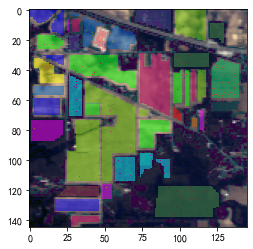

In [14]:
view = spectral.imshow(show_x, (30, 20, 10), classes=show_y)
view.set_display_mode('overlay')
view.class_alpha = 0.5